In [1]:
import pandas as pd
import numpy as np
import os
import random
import spacy
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import sys
from wordcloud import WordCloud
import json

In [2]:
# reading into python all csv files
df_CA = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\CAvideos.csv", encoding='utf-8')
df_DE = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\DEvideos.csv", encoding='utf-8')
df_FR = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\FRvideos.csv", encoding='utf-8')
df_GB = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\GBvideos.csv", encoding='utf-8')
df_IN = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\INvideos.csv", encoding='utf-8')
df_JP = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\JPvideos.csv", encoding='utf-8')
df_KR = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\KRvideos.csv", encoding='utf-8')
df_MX = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\MXvideos.csv", encoding='utf-8')
df_RU = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\RUvideos.csv", encoding='utf-8')
df_US = pd.read_csv(r"C:\Users\Aishwarya\Downloads\Acads\Semester 2\Prof Bono\Bono Project\USvideos.csv", encoding='utf-8')

In [3]:
names_of_dataframes = [df_CA,df_DE,df_FR,df_GB,df_IN,df_JP,df_KR,df_MX,df_RU,df_US]
langlist = []
for i in names_of_dataframes:
    if (TextBlob(i['description'][0]).detect_language() == 'en'):
        langlist.append('en')
    else:
        langlist.append('not_en')

In [4]:
langlist

['en',
 'not_en',
 'not_en',
 'en',
 'en',
 'not_en',
 'not_en',
 'not_en',
 'not_en',
 'en']

In [5]:
#adding the "Country" column for all datasets
names_of_countries = ['CA','DE','FR','GB','IN','JP','KR','MX','RU','US']
names_of_dataframes = [df_CA,df_DE,df_FR,df_GB,df_IN,df_JP,df_KR,df_MX,df_RU,df_US]
for i in range(len(names_of_countries)):
    names_of_dataframes[i]['Country'] = names_of_countries[i]

In [6]:
#combining all dataframes into one dataframe
names_of_dataframes = [df_DE,df_FR,df_GB,df_IN,df_JP,df_KR,df_MX,df_RU,df_US]
#textproc_df = pd.DataFrame(df_CA)
final_df = pd.DataFrame(df_CA)
for i in names_of_dataframes:
    #if (TextBlob(i['title'][random.randint(1,10)]).detect_language() == 'en'):
       # textproc_df = textproc_df.append(i)
    final_df = final_df.append(i)

# Final_df Analysis 

Feature engineering on only numerical variables

In [7]:
#We first study the shape of this dataset
final_df.shape

(375942, 17)

In [8]:
final_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [9]:
# check whether there are any columns that have null/missing values.
final_df.isna().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               19478
Country                       0
dtype: int64

In [10]:
final_df.duplicated().sum()

12570

In [11]:
final_df.drop_duplicates(inplace=True)

In [12]:
final_df.duplicated(subset='video_id').sum()

179123

In [13]:
final_df[final_df.video_id == 'uxbQATBAXf8']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country
34120,uxbQATBAXf8,18.12.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",9399654,268149,2400,6739,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,CA
34327,uxbQATBAXf8,18.13.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",13293647,334533,3302,8333,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,CA
34821,uxbQATBAXf8,18.15.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",15960127,374827,3823,9059,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,CA
33980,uxbQATBAXf8,18.11.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",4369014,147238,997,3929,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,DE
34145,uxbQATBAXf8,18.12.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",9399654,268149,2400,6739,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,DE
34404,uxbQATBAXf8,18.13.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",13293647,334533,3302,8333,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,DE
33993,uxbQATBAXf8,18.11.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",4369014,147238,997,3929,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,FR
34203,uxbQATBAXf8,18.12.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",9399654,268149,2400,6739,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,FR
33137,uxbQATBAXf8,18.11.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",4369014,147238,997,3929,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,GB
33297,uxbQATBAXf8,18.12.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",9399654,268143,2399,6739,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,GB


In [14]:
# Create a column named 'trending_date_counts' that indicates the number of time that video is on trending.
final_df['trending_date_count'] = final_df.groupby(['video_id'])['trending_date'].transform('count')

In [15]:
# Now, we will visualise a few lines of this new column
final_df['trending_date_count'].head(10)

0    26
1     9
2    13
3    13
4    23
5     3
6     4
7    18
8     6
9     3
Name: trending_date_count, dtype: int64

In [16]:
# remove the other rows with the same video_id and older numbers.
final_df.drop_duplicates(subset='video_id', keep='last', inplace=True)

In [17]:
# Re-verifying that our non-duplicate row now has only one unique row in the dataframe
final_df[final_df.video_id == 'uxbQATBAXf8']

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,trending_date_count
34792,uxbQATBAXf8,18.15.05,Deadpool 2 | With Apologies to David Beckham,20th Century Fox,1,2018-05-10T14:24:29.000Z,"Trailer|""Deadpool""|""20th Century Fox (Producti...",15960127,374825,3823,9059,https://i.ytimg.com/vi/uxbQATBAXf8/default.jpg,False,False,False,Get your Deadpool 2 tickets at http://www.Dead...,US,22


In [18]:
final_df.reset_index(drop = True, inplace = True)


In [19]:
#change the trending_date
final_df['trending_date'].replace('\.','-',regex=True,inplace=True) #'-' no regular expression
type(final_df['trending_date'][0])
final_df['new_column']='20'
final_df['trending_date'] = final_df.agg(lambda x: f"{x['new_column']}{x['trending_date']}", axis=1)
final_df['trending_date'] = pd.to_datetime(final_df['trending_date'],format='%Y-%d-%m')         
del final_df['new_column']                            
#type(final_df['trending_date'][0])

In [20]:
#Now, we view the result
final_df['trending_date'].head(3)

0   2017-11-14
1   2017-11-14
2   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [21]:
#change the publish_time column to a better, readable format
final_df.insert(5,'publish_date',final_df['publish_time'].map(lambda name:name.split('T')[0])) 
final_df['publish_time']=final_df['publish_time'].map(lambda name:name.split('T')[1])
final_df['publish_date'] = pd.to_datetime(final_df['publish_date']) 
final_df['publish_time'] = pd.to_datetime(final_df['publish_time']) 

In [22]:
#Now, we will study the data-types of each column
final_df.info() #df.dtypes
final_df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184249 entries, 0 to 184248
Data columns (total 19 columns):
video_id                  184249 non-null object
trending_date             184249 non-null datetime64[ns]
title                     184249 non-null object
channel_title             184249 non-null object
category_id               184249 non-null int64
publish_date              184249 non-null datetime64[ns]
publish_time              184249 non-null datetime64[ns, UTC]
tags                      184249 non-null object
views                     184249 non-null int64
likes                     184249 non-null int64
dislikes                  184249 non-null int64
comment_count             184249 non-null int64
thumbnail_link            184249 non-null object
comments_disabled         184249 non-null bool
ratings_disabled          184249 non-null bool
video_error_or_removed    184249 non-null bool
description               171143 non-null object
Country                   184249 non-n

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_date', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'Country',
       'trending_date_count'],
      dtype='object')

In [23]:
# Translate the boolean values into numeric values
final_df["comments_disabled"]=final_df["comments_disabled"].astype(int)
final_df["ratings_disabled"]=final_df["ratings_disabled"].astype(int)
final_df["video_error_or_removed"]=final_df["video_error_or_removed"].astype(int)

In [24]:
type(final_df['comments_disabled'][9]) # confirming that our conversion was successful

numpy.int32

In [25]:
# Use normalization to reduce skewness of the data if necessary
from sklearn import preprocessing
import numpy as np
# Normalize views
x_array = np.array(final_df['views'])
normalized_X = preprocessing.normalize([x_array])
normalized_X_dataframe = pd.DataFrame(normalized_X)   
final_df['views']=normalized_X_dataframe.T
#display(df['views'])

# Normalize likes
x_array = np.array(final_df['likes'])
normalized_Y = preprocessing.normalize([x_array])
normalized_Y_dataframe = pd.DataFrame(normalized_Y)   
final_df['likes']=normalized_Y_dataframe.T


# Normalize dislikes
x_array = np.array(final_df['dislikes'])
normalized_Z = preprocessing.normalize([x_array])
normalized_Z_dataframe = pd.DataFrame(normalized_Z)   
final_df['dislikes']=normalized_Z_dataframe.T


# Normalize comment_count
x_array = np.array(final_df['comment_count'])
normalized_C = preprocessing.normalize([x_array])
normalized_C_dataframe = pd.DataFrame(normalized_C)   
final_df['comment_count']=normalized_C_dataframe.T

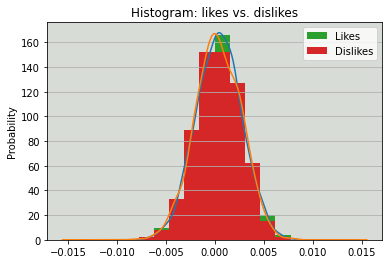

In [26]:
# draw the graph from the distribution between 'likes' and 'dislikes'
means = final_df['likes'].mean(), final_df['dislikes'].mean()
stdevs = final_df['likes'].std(axis = 0, skipna = True), final_df['dislikes'].std(axis = 0, skipna = True)
dist = pd.DataFrame(
np.random.normal(loc=means, scale=stdevs, size=(1000, 2)),
columns=['Likes', 'Dislikes'])
dist.agg(['min', 'max', 'mean', 'std']).round(decimals=2)

fig, ax = plt.subplots()
dist.plot.kde(ax=ax, legend=False, title='Histogram: likes vs. dislikes')
dist.plot.hist(density=True, ax=ax)
ax.set_ylabel('Probability')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

In [27]:
final_df['Tags'] = final_df['tags'].map(lambda tags:tags.split('|'))

In [28]:
# We now view a few lines of the Tags column to see the list created
final_df['Tags'].head(4)

0    [電視劇, "大陸電視劇", "猎场", "职场", "商战", "爱情", "都市", "...
1    [prank, "pranks", "nelk", "nelkfilmz", "nelkfi...
2    [Rooster Teeth, "RT", "animation", "television...
3    [Industrial Fan, "Industrial Fan Destruction",...
Name: Tags, dtype: object

In [29]:
for i in range(len(final_df['Tags'])):
    #k = final_df['Tags'][i]
    for k in range(len(final_df['Tags'][i])):
        final_df['Tags'][i][k] = final_df['Tags'][i][k].replace('\"','').rstrip().lstrip()

In [30]:
#Now, we will view our results of the clean column df_US['Tags']
final_df['Tags'].head(3)

0    [電視劇, 大陸電視劇, 猎场, 职场, 商战, 爱情, 都市, 胡歌, 陈龙, 孙红雷, ...
1          [prank, pranks, nelk, nelkfilmz, nelkfilms]
2    [Rooster Teeth, RT, animation, television, fil...
Name: Tags, dtype: object

In [31]:
final_df['TagCount'] = final_df['Tags'].map(lambda x:len(x))

In [32]:
#Viewing the results of the new column "TagCount"
final_df['TagCount'].head()

0    33
1     5
2    49
3    22
4    29
Name: TagCount, dtype: int64

# Text_df Analysis

In [33]:
names_of_countries = ['CA','DE','FR','GB','IN','JP','KR','MX','RU','US']

In [34]:
final_df['Country'].value_counts()

RU    34081
MX    32643
FR    27557
DE    23327
IN    15776
KR    15537
CA    14865
JP    12155
US     6282
GB     2026
Name: Country, dtype: int64

In [35]:
final_df['Country'].unique()

array(['CA', 'DE', 'FR', 'GB', 'IN', 'JP', 'KR', 'MX', 'RU', 'US'],
      dtype=object)

In [36]:
langlist

['en',
 'not_en',
 'not_en',
 'en',
 'en',
 'not_en',
 'not_en',
 'not_en',
 'not_en',
 'en']

In [37]:
qualified_countries = ['CA','IN','US','GB']


We can see that dataframes CA, GB,IN and US are in english.

In [38]:
textdf = final_df[final_df['Country'].isin(['CA', 'IN','GB','US'])]

In [39]:
textdf.head(3)

,video_id,trending_date,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,...,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Country,trending_date_count,Tags,TagCount
0,FyZMnhUtLfE,2017-11-14,猎场 | Game Of Hunting 12【TV版】（胡歌、張嘉譯、祖峰等主演）,大劇獨播,1,2017-11-12,2020-04-29 16:00:01+00:00,"電視劇|""大陸電視劇""|""猎场""|""职场""|""商战""|""爱情""|""都市""|""胡歌""|""陈龙""...",0.000233,0.000011,...,0.000054,https://i.ytimg.com/vi/FyZMnhUtLfE/default.jpg,0,0,0,Thanks for watching the drama! Help more peopl...,CA,1,"[電視劇, 大陸電視劇, 猎场, 职场, 商战, 爱情, 都市, 胡歌, 陈龙, 孙红雷, ...",33
1,gifPYwArCVQ,2017-11-14,Fake Pet Smart Employee Prank!,NELK,23,2017-11-13,2020-04-29 01:30:01+00:00,"prank|""pranks""|""nelk""|""nelkfilmz""|""nelkfilms""",0.000818,0.002232,...,0.002789,https://i.ytimg.com/vi/gifPYwArCVQ/default.jpg,0,0,0,3 Days left to cop NELK merch: https://nelk.ca...,CA,1,"[prank, pranks, nelk, nelkfilmz, nelkfilms]",5
2,fy-CuCzaPp8,2017-11-14,Rooster Teeth Animated Adventures - Drunk Baby...,Rooster Teeth,1,2017-11-13,2020-04-29 14:00:03+00:00,"Rooster Teeth|""RT""|""animation""|""television""|""f...",0.000453,0.000979,...,0.000144,https://i.ytimg.com/vi/fy-CuCzaPp8/default.jpg,0,0,0,Miles gets stuck at work one night watching ov...,CA,1,"[Rooster Teeth, RT, animation, television, fil...",49


In [40]:
textdf['Country'].unique()

array(['CA', 'GB', 'IN', 'US'], dtype=object)

In [41]:
textdf.shape

(38949, 21)

In [42]:
textdf['description_url']=textdf["description"].str.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
textdf['description_url']

0         [https://goo.gl/q8oOgq, https://goo.gl/bXGIIs\...
1         [https://nelk.ca\n\nFollow, https://twitter.co...
2         [http://bit.ly/2uRn6Ox\n\nAudio, http://rooste...
3         [https://www.youtube.com/watch?v=dFm7n5tQzrU\n...
4         [http://bit.ly/GMM1218, http://bit.ly/GMM1217,...
                                ...                        
184244                                                   []
184245                                                  NaN
184246    [https://goo.gl/C92AmbSHOP, https://goo.gl/VN6...
184247    [https://bit.ly/HISHEPlaylistSubscribe, https:...
184248    [https://www.callofduty.com/blackops4/buyFollo...
Name: description_url, Length: 38949, dtype: object

In [44]:
textdf['description_url'].isnull().sum()

1077

In [45]:
textdf.shape

(38949, 22)

In [46]:
textdf['description_url']=textdf['description_url'].fillna(0)

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [47]:
# Calculate the length of each observation of description_url column
textdf['len']=textdf['description_url'].apply(lambda x: len(x) if x!=0 else 0)

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
textdf.reset_index(inplace = True)

In [49]:
# Remove "\\n" in description_url column
urls=[]
for i in range(len(textdf)):
    if textdf['len'][i]!=0:
        url=[]
        for j in textdf['description_url'][i]:
            suburl=0
            suburl=j.split('\\n')
            for item in range(len(suburl)):
                if suburl[item].find('http')!=-1:
                    url.append(suburl[item])
        urls.append(url)
    else:
        urls.append(0)

In [50]:
# Create a column to save the pure urls
textdf['pure_description_url']=urls

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [51]:
# Now, we see a few lines of this newly created column
textdf['pure_description_url'][0]

['https://goo.gl/q8oOgq',
 'https://goo.gl/bXGIIs',
 'https://goo.gl/8PkYmN',
 'https://goo.gl/9cFiDv',
 'https://goo.gl/a1bkPp',
 'https://goo.gl/ZiGH7M',
 'https://goo.gl/Vy6qzA',
 'https://goo.gl/BTmsPB',
 'https://goo.gl/1MBDKO',
 'https://goo.gl/4wiaLB']

In [52]:
textdf['description_text']=textdf['description']

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
for i in range(len(textdf)):
    if textdf['len'][i]!=0:
        for j in range(textdf['len'][i]):
            textdf['description_text'][i]=textdf['description_text'][i].replace(textdf['description_url'][i][j],'')

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Aishwarya\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3326: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [54]:
# Once done, we verify if the description text is truly free of its urls
textdf['description_text'][1]

'3 Days left to cop NELK merch:  us on Instagram!\\n@nelkboys\\n\\nNELK\\nTwitter:   nelkfilmz\\n\\nALL THE FIRE MUSIC BY:\\nInstagram - @StanBeats\\nStolen Identity - KILLY\\n\\nIntro and Outro Shot by: @leecreated\\n\\nFILMER:\\nInstagram - @905shooter'

In [55]:
# present the frenquency of trendy title
textdf["title"]=textdf["title"].astype(str)
df_new = textdf[textdf['title'].notnull()]

C:\Users\Aishwarya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


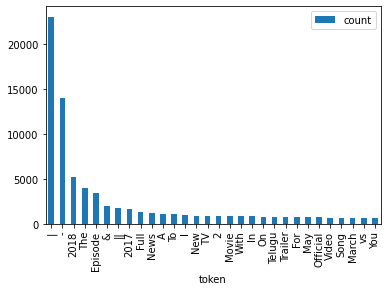

In [56]:
def my_tokenizer(text):
    return text.split() if text!= None else []
tokens=df_new.title.map(my_tokenizer).sum()
#create token list
from collections import Counter

counter=Counter(tokens)
counter.most_common(20)

#remove stop words
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    '''remove stopwords from a list of tokens.'''
    return [t for t in tokens if t not in STOP_WORDS]
#rebuild counter
counter=Counter(remove_stopwords(tokens))
counter.most_common(30)

freq_df=pd.DataFrame.from_records(counter.most_common(30),
                                  columns=['token','count'])
#create bar plot
freq_df.plot(kind='bar',x='token');

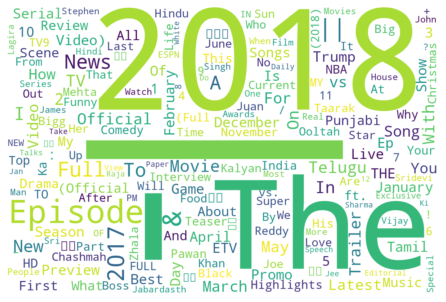

In [57]:
def my_tokenizer(text):
    return text.split() if text!= None else []
tokens=df_new.title.map(my_tokenizer).sum()
#create token list
from collections import Counter

counter=Counter(tokens)
counter.most_common(20)

#remove stop words
from spacy.lang.en.stop_words import STOP_WORDS

def remove_stopwords(tokens):
    '''remove stopwords from a list of tokens.'''
    return [t for t in tokens if t not in STOP_WORDS]
#rebuild counter
counter=Counter(remove_stopwords(tokens))

#covert list of tuples onto wordcloud
from wordcloud import WordCloud

def wordcloud(counter):
    wc=WordCloud(width=1200,height=800,
                 background_color='white',
                 max_words=200)
    wc.generate_from_frequencies(counter)

    #plot
    fig=plt.figure(figsize=(6,4))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

#create wordcloud
wordcloud(counter)

In [ ]:
# Checking if the dataset is clean or not

In [58]:
final_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_date', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description', 'Country',
       'trending_date_count', 'Tags', 'TagCount'],
      dtype='object')

In [68]:
final_df.to_csv("final_df.csv")

In [69]:
textdf.to_csv("text_df.csv")